In [1]:
import pandas
chiller = pandas.read_csv('chiller1clean.csv', parse_dates = ['Time'], index_col = 'Time', dayfirst = True) 

I cleansed the data in notepad using CTRL+F to delete a row of strings, "Log Start".

In [2]:
chiller['kWR'] = 0.001 * chiller.Flow * 1000 * 4.19 * (chiller.EnterTemp - chiller.LeaveTemp)
chiller['COP'] = chiller.kWR/chiller.kWE
chiller_on = chiller.loc[chiller['kWE'] > 0]
chiller

,Flow,EnterTemp,LeaveTemp,kWE,kWR,COP
Time,,,,,,
2021-04-30 08:50:00,24.218475,12.0,5.9,66.559140,619.000000,9.3
2021-04-30 08:51:00,24.218475,12.0,5.9,66.559140,619.000000,9.3
2021-04-30 08:55:00,23.514221,12.1,6.0,64.623656,601.000000,9.3
2021-04-30 08:56:00,23.514221,12.1,6.0,64.623656,601.000000,9.3
2021-04-30 09:00:00,27.645185,12.1,6.1,80.813953,695.000000,8.6
...,...,...,...,...,...,...
2022-03-02 17:49:00,0.037499,14.5,14.6,0.000000,-0.015712,-inf
2022-03-02 17:50:00,0.037499,14.5,14.6,0.000000,-0.015712,-inf
2022-03-02 17:51:00,0.037499,14.5,14.6,0.000000,-0.015712,-inf


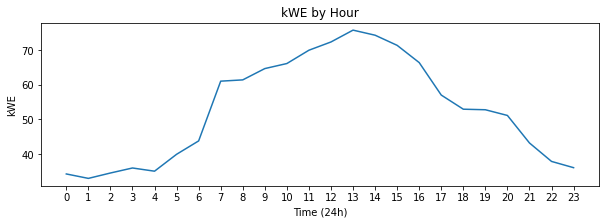

In [126]:
hour = chiller_on.groupby(chiller_on.index.hour).mean()
day = chiller_on.groupby(chiller_on.index.day_of_week).mean()
month = chiller_on.groupby(chiller_on.index.month).mean()

kWE_hour = hour['kWE'].plot(figsize=(10, 3), title='kWE by Hour', xlabel ='Time (24h)', ylabel = 'kWE')
ticks = kWE_hour.set_xticks(range(0,24))

kWE by hour peaks at 1PM with approximately 80kW of energy consumed by the chiller

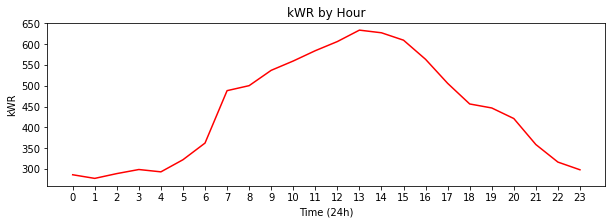

In [14]:
kWR_hour = hour['kWR'].plot(figsize=(10, 3), color = 'r', title='kWR by Hour', xlabel='Time (24h)', ylabel = 'kWR')
ticks = kWR_hour.set_xticks(range(0,24))

As expected, kWR peaks at the same time as kWE, as more energy consumed leads to a greater amount of refridgeration

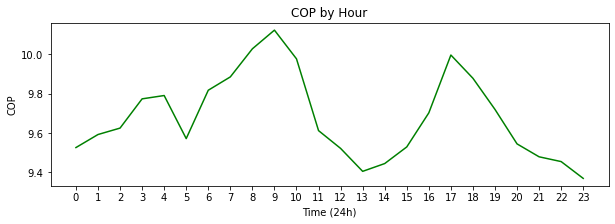

In [15]:
COP_hour = hour['COP'].plot(figsize=(10, 3), color = 'g', title='COP by Hour', xlabel='Time (24h)', ylabel = 'COP')
ticks = COP_hour.set_xticks(range(0,24))

Coefficient of Performance has a minimum at 13:00 calculated from kWR/kWE, meaning that at maximum energy consumption,
the system is inefficient.

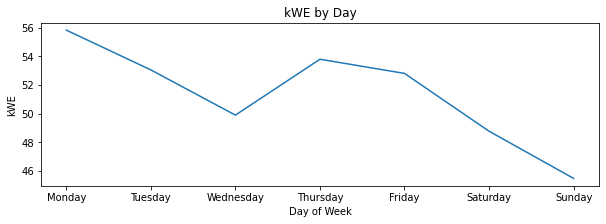

In [129]:
kWE_day = day['kWE'].plot(figsize=(10, 3), title='kWE by Day', xlabel='Day of Week', ylabel = 'kWE')
day_of_week = day.index
ticks = kWE_day.set_xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Kilowatts of electriity peaks on Monday and continues throughout the week before stagnating on the weekend

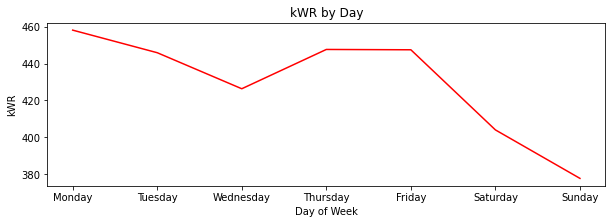

In [17]:
kWR_day = day['kWR'].plot(figsize=(10, 3), color = 'r', title='kWR by Day', xlabel='Day of Week', ylabel = 'kWR')
ticks = kWR_day.set_xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Kilowatts of refridgeration follows same trend as kWE as expected

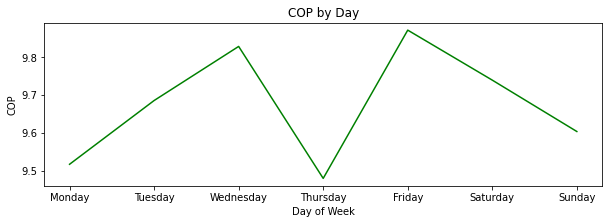

In [18]:
COP_day = day['COP'].plot(figsize=(10, 3), color = 'g', title='COP by Day', xlabel='Day of Week', ylabel = 'COP')
ticks = COP_day.set_xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

COP minimum is at kWE maximum as expected

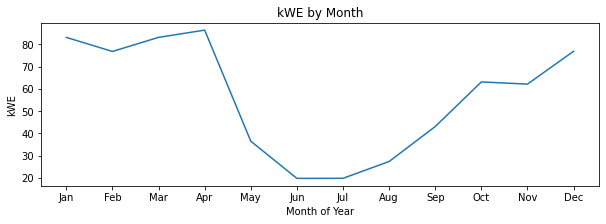

In [19]:
kWE_month = month['kWE'].plot(figsize=(10, 3), title='kWE by Month', xlabel='Month of Year', ylabel = 'kWE')
tick = kWE_month.set_xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

kWE has a maximum during the summer holidays, december to january. This is expected as the chiller uses more energy in summer to operate

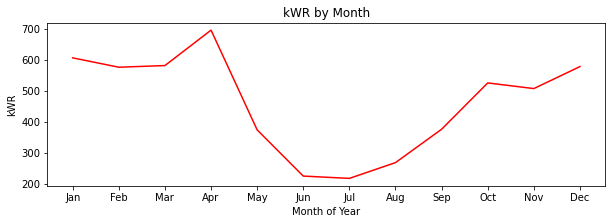

In [20]:
kWR_month = month['kWR'].plot(figsize=(10, 3), color = 'r', title='kWR by Month', xlabel='Month of Year', ylabel = 'kWR')
tick = kWR_month.set_xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

kWR by month follows kWE by month as expected

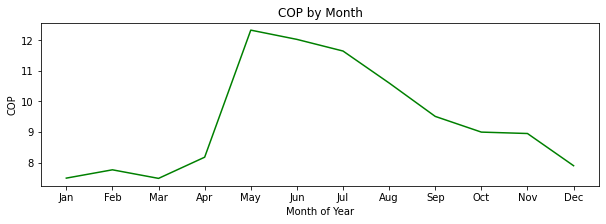

In [21]:
COP_month = month['COP'].plot(figsize=(10, 3), color = 'g', title='COP by Month', xlabel='Month of Year', ylabel = 'COP')
tick = COP_month.set_xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

COP by month peaks at june when least amount of energy is consumed as expected. In winter, it is also easier to cool due to the lower room temperature.

In [130]:
def operating(group) :
    percentage = 0
    for i in group :
        if (i > 0) :
            percentage += 1
    return 100*percentage/len(group)

operating_hour = chiller.groupby(chiller.index.hour)['kWE'].agg(operating)
operating_day = chiller.groupby(chiller.index.day_of_week)['kWE'].agg(operating)
operating_month = chiller.groupby(chiller.index.month)['kWE'].agg(operating)

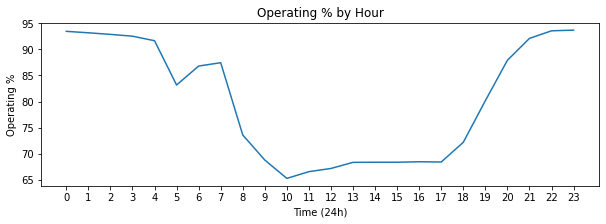

In [131]:
hour = operating_hour.plot(figsize=(10, 3), title='Operating % by Hour', xlabel ='Time (24h)', ylabel = 'Operating %')
ticks = hour.set_xticks(range(0,24))

Chiller operates most at night time. However, kWE by hour peaks at noon. This could be due to the higher surrounding temperature causing a higher kWE at noon.

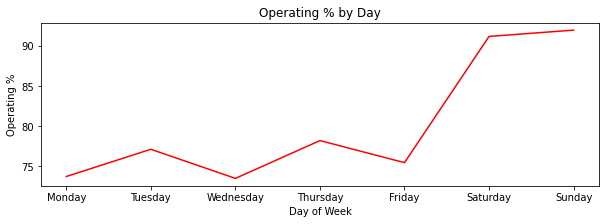

In [24]:
day = operating_day.plot(figsize=(10, 3), color = 'r', title='Operating % by Day', xlabel ='Day of Week', ylabel = 'Operating %')
ticks = day.set_xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Chiller operates most on weekends, Saturday and Sunday

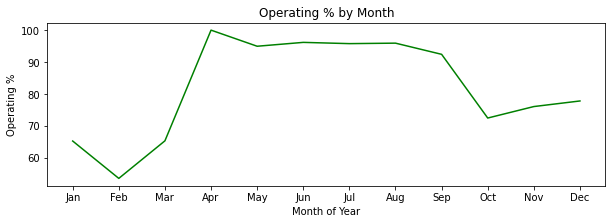

In [106]:
month = operating_month.plot(figsize=(10, 3), color = 'g',  title='Operating % by Month', xlabel ='Month of Year', ylabel = 'Operating %')
tick = month.set_xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

Chiller operates most during winter, least during summer and February. This may be because the COP is more favourable in the winter months.

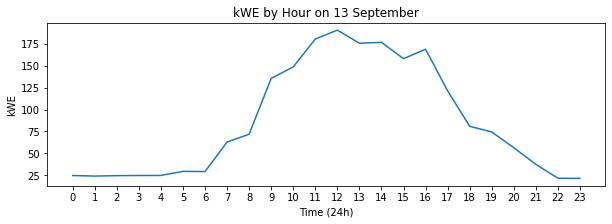

In [148]:
birthday = chiller_on.loc[(chiller_on.index.month == 9) & (chiller_on.index.day == 13)]
operating_hour_birthday = birthday.groupby(birthday.index.hour)['kWE'].agg(operating)
hour = birthday.groupby(birthday.index.hour).mean()

kWE = hour['kWE'].plot(figsize=(10, 3), title='kWE by Hour on 13 September', xlabel ='Time (24h)', ylabel = 'kWE')
ticks = kWE.set_xticks(range(0,24))

kWE peaks at noon, similar to prevvious trends

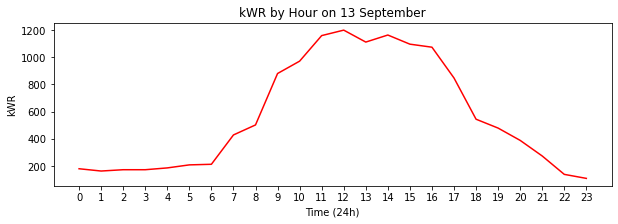

In [51]:
kWR = hour['kWR'].plot(figsize=(10, 3), color = 'r', title='kWR by Hour on 13 September', xlabel ='Time (24h)', ylabel = 'kWR')
ticks = kWR.set_xticks(range(0,24))

kWR follows kWE as expected

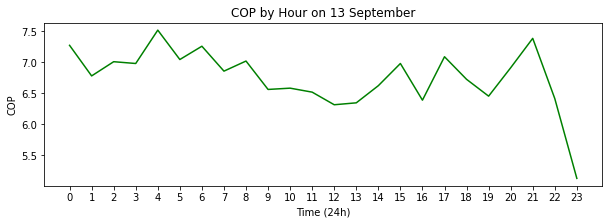

In [95]:
COP = hour['COP'].plot(figsize=(10, 3), color = 'g', title='COP by Hour on 13 September', xlabel ='Time (24h)', ylabel = 'COP')
ticks = COP.set_xticks(range(0,24))

Chiller coefficient of performance suddenly drops at 1PM without a plausible reason. This drop is more significant than previous trends, where the average COP at 11PM is 9.4-9.5.

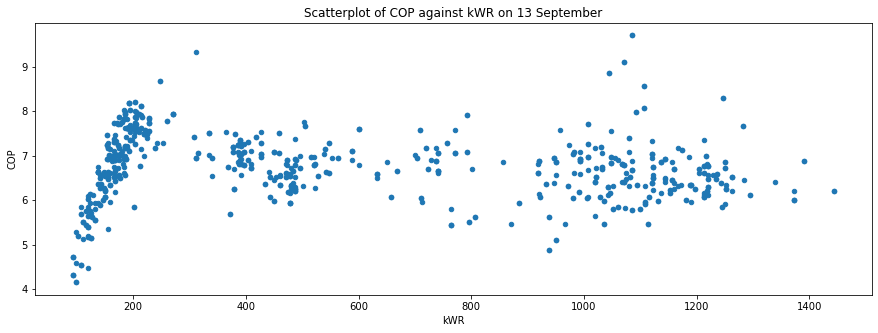

In [146]:
kWR_scatter = birthday.plot.scatter(x = 'kWR', y = 'COP', figsize = (15,5), title = 'Scatterplot of COP against kWR on 13 September')

Scatterplot shows that COP peaks at around 200 kWR. Majority of the points are clustered before 200 kWR, showing a clearer correlation between COP and kWR at the start.

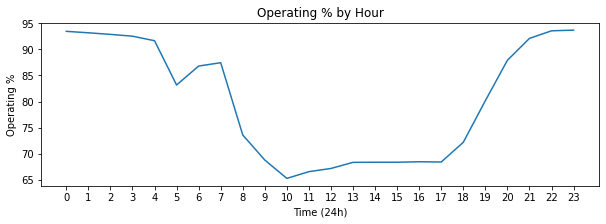

In [8]:
operating = operating_hour.plot(figsize=(10, 3), title='Operating % by Hour', xlabel ='Time (24h)', ylabel = 'Operating %')
ticks = operating.set_xticks(range(0,24))

Chiller is operating mostly at night, as expected and corresponding with previous trends.

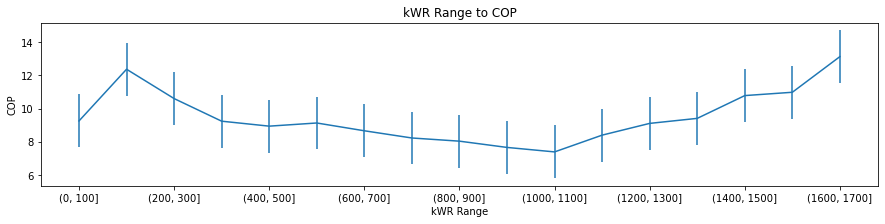

In [149]:
kWR_bin = chiller_on.groupby(pandas.cut(chiller_on.kWR, range(0,1800,100))).mean()
bin_plot = kWR_bin['COP'].plot(yerr = kWR_bin['COP'].std(), figsize=(15, 3),  title='kWR Range to COP', xlabel ='kWR Range', ylabel = 'COP')

Coefficient of performance is greatest when the kWR is between 100-150 and 1600-1700